<a href="https://colab.research.google.com/github/AnnJungChan/TECHCROSS/blob/main/DATA_SEARCH/OCCUR_TIME%EC%9D%B4_START_TIME%EA%B3%BC_END_TIME_%EC%82%AC%EC%9D%B4%EC%97%90_%EC%A1%B4%EC%9E%AC%ED%95%98%EB%8A%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 테이블 결합

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
EVENT = pd.read_csv('/content/gdrive/MyDrive/DB/EVENT.csv')
OPTIME = pd.read_csv('/content/gdrive/MyDrive/DB/OPTIME.csv')
OPTIME_EVENT = pd.read_csv('/content/gdrive/MyDrive/DB/OPTIME_EVENT.csv')

In [3]:
EVENT = pd.read_csv('/content/gdrive/MyDrive/DB/EVENT.csv')
OPTIME = pd.read_csv('/content/gdrive/MyDrive/DB/OPTIME.csv')
OPTIME_EVENT = pd.read_csv('/content/gdrive/MyDrive/DB/OPTIME_EVENT.csv')
EVENT['SECTION']=EVENT['SECTION'].astype('str')
EVENT['EVENT_INDEX'] = EVENT['EVENT_INDEX'].astype('str')
OPTIME_EVENT['SECTION']=OPTIME_EVENT['SECTION'].astype('str')
OPTIME_EVENT['EVENT_INDEX'] = OPTIME_EVENT['EVENT_INDEX'].astype('str')
EVENT['KEY']=EVENT['SHIP_ID']+"_"+ EVENT['SECTION']+"_"+ EVENT['EVENT_INDEX']
OPTIME_EVENT['KEY']=OPTIME_EVENT['SHIP_ID']+"_"+ OPTIME_EVENT['SECTION']+"_"+ OPTIME_EVENT['EVENT_INDEX']
EVENT_JOIN_OPTIME_EVENT = pd.merge(EVENT, OPTIME_EVENT, how = "inner", on = "KEY")
EVENT_JOIN_OPTIME_EVENT.drop(columns = ["SHIP_ID_x", "SYSTEM_x", "EVENT_INDEX_x", "SECTION_x"],inplace = True)
EVENT_JOIN_OPTIME_EVENT.rename(columns = {'SHIP_ID_y' : 'SHIP_ID', 'EVENT_INDEX_y':'EVENT_INDEX', 'SYSTEM_y' : 'SYSTEM', 'SECTION_y' : 'SECTION'}, inplace = True)
EVENT_JOIN_OPTIME_EVENT.drop(columns = ["KEY"],inplace = True)
EVENT_JOIN_OPTIME_EVENT['KEY'] = EVENT_JOIN_OPTIME_EVENT['SHIP_ID']+"_"+  EVENT_JOIN_OPTIME_EVENT['SECTION'].astype('str')+"_"+  EVENT_JOIN_OPTIME_EVENT['OP_INDEX'].astype('str')
OPTIME['KEY'] = OPTIME['SHIP_ID']+"_"+  OPTIME['SECTION'].astype('str')+"_"+  OPTIME['OP_INDEX'].astype('str')
EVENT_JOIN_OPTIME = pd.merge(EVENT_JOIN_OPTIME_EVENT, OPTIME, how = "inner", on = "KEY")
EVENT_JOIN_OPTIME.drop(columns = ["SHIP_ID_x", "SYSTEM_x", "SECTION_x",'FILE_INDEX_x','OP_INDEX_x'],inplace = True)
EVENT_JOIN_OPTIME.rename(columns = {'SHIP_ID_y' : 'SHIP_ID', 'OP_INDEX_y':'OP_INDEX', 'SYSTEM_y' : 'SYSTEM', 'SECTION_y' : 'SECTION', 'FILE_INDEX_y':'FILE_INDEX'}, inplace = True)

# 비교

In [4]:
PAIR=EVENT_JOIN_OPTIME[['START_TIME', 'END_TIME','OCCUR_TIME']]
PAIR['OCCUR_TIME']=PAIR['OCCUR_TIME'].astype("datetime64")
PAIR['START_TIME']=PAIR['START_TIME'].astype("datetime64")
PAIR['END_TIME']=PAIR['END_TIME'].astype("datetime64")
PAIR['EXIST'] = np.zeros(312793)

for i in range(312793) :
  PAIR['EXIST'][i] = (PAIR['OCCUR_TIME'][i]>=PAIR['START_TIME'][i]) & (PAIR['OCCUR_TIME'][i]<=PAIR['END_TIME'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

START_TIME< OCCUR_TIME < END_TIME 이면 TRUE를 반환하고, 아니면 FALSE를 반환하도록 하였다.

In [5]:
sum(PAIR['EXIST'])

312764

TRUE인 값은 312764개

In [6]:
len(PAIR['EXIST'])

312793

전체의 갯수는 312793개

In [7]:
len(PAIR['EXIST'])-sum(PAIR['EXIST'])

29

29개의 OCCUR_TIME이 START_TIME과 END_TIME사이에 위치하지 않았다.

In [15]:
#PAIR[PAIR['EXIST'] == False]

일치하지 않는 목록들은 보통 END_TIME 이후에 OCCUR_TIME이 일어난 경우였다.

In [14]:
#PAIR[PAIR['EXIST'] == False]['OCCUR_TIME'] - PAIR[PAIR['EXIST'] == False]['END_TIME']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 4 artists>

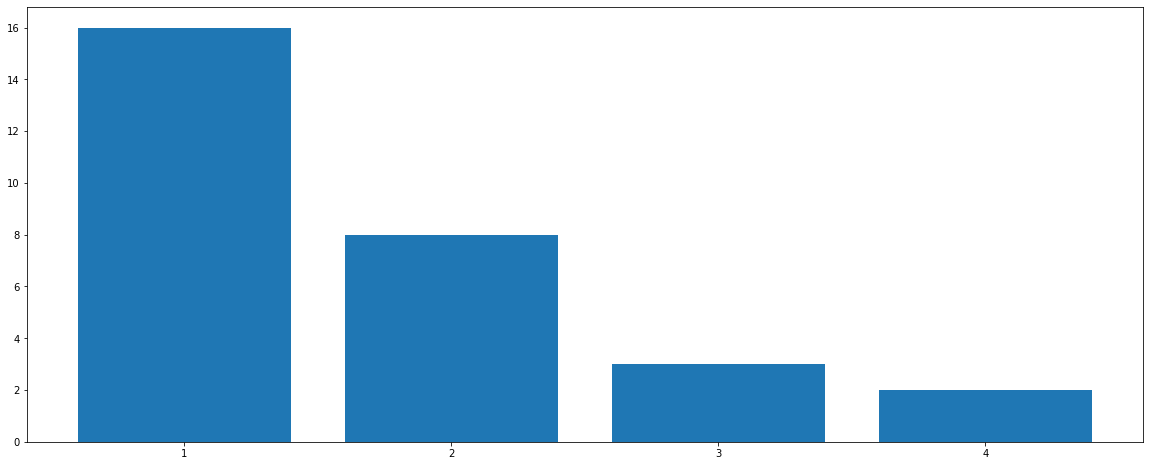

In [10]:
from IPython.core.pylabtools import figsize
data = PAIR[PAIR['EXIST'] == False]['OCCUR_TIME'] - PAIR[PAIR['EXIST'] == False]['END_TIME']
pd.DataFrame(np.array(data.astype(int)/1000000000)).value_counts()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,8))
plt.bar(['1','2','3','4'],[16,8,3,2])

보통 1초의 딜레이가 존재하였고, 제일 딜레이가 큰 시간은 4초였다.

In [11]:
EVENT_FALSE = EVENT
EVENT_FALSE=EVENT_FALSE.loc[EVENT_FALSE['LOG_LEVEL'] == -99999999,:]

for i in range(29) :
  EVENT_FALSE=EVENT_FALSE.append(EVENT.loc[EVENT['OCCUR_TIME'].astype("datetime64")==PAIR[PAIR['EXIST'] == False]['OCCUR_TIME'].iloc[i],:])

- 딜레이가 생긴 이유는 장치가 멈추기 전에 END_TIME에 OPERATION이 끝났다고 기록을 했기 때문이다.

- 즉, 이러한 29개의 데이터에 대해서는 OCCUR_TIME을 조금 더 뒤로 미뤄주면 된다. 장치를 끄면서 생긴 단순한 문제이다.

In [13]:
#EVENT_FALSE